In [34]:
import pandas as pd
import quandl
import numpy as np
import scipy as sp

quandl.ApiConfig.api_key = 'h6tfVg1ps54v4bcpc3xz'
data = quandl.get_table('WIKI/PRICES', ticker='AAPL')

In [6]:
data.head()

,ticker,date,open,high,low,close,volume,ex-dividend,split_ratio,adj_open,adj_high,adj_low,adj_close,adj_volume
None,,,,,,,,,,,,,,
0,AAPL,1980-12-12,28.75,28.87,28.75,28.75,2093900.0,0.0,1.0,0.424421,0.426193,0.424421,0.424421,117258400.0
1,AAPL,1980-12-15,27.38,27.38,27.25,27.25,785200.0,0.0,1.0,0.404196,0.404196,0.402277,0.402277,43971200.0
2,AAPL,1980-12-16,25.37,25.37,25.25,25.25,472000.0,0.0,1.0,0.374524,0.374524,0.372752,0.372752,26432000.0
3,AAPL,1980-12-17,25.87,26.00,25.87,25.87,385900.0,0.0,1.0,0.381905,0.383824,0.381905,0.381905,21610400.0
4,AAPL,1980-12-18,26.63,26.75,26.63,26.63,327900.0,0.0,1.0,0.393125,0.394896,0.393125,0.393125,18362400.0


In [131]:
returns = data.close.shift(periods=-1)/data.close
returns_log = np.log(data.close.shift(periods=-1)/data.close)

In [136]:
returns_log.describe()

count    9236.000000
mean        0.000178
std         0.037659
min        -1.930035
25%        -0.013975
50%         0.000000
75%         0.015042
max         0.286796
Name: close, dtype: float64

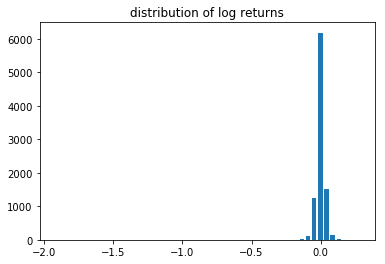

In [145]:
%matplotlib inline
import matplotlib.pyplot as plt
hist, bins = np.histogram(returns_log.dropna(), bins=50)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.title("distribution of log returns")
plt.show()

In [146]:
# test that log returns belong to standard normal distribution (mean=0, std=1)
stats.ttest_1samp(prices_norm,0)

Ttest_1sampResult(statistic=array([-181.2912528]), pvalue=array([ 0.]))

In [124]:
# test normality of prices
prices = data.loc[:, ["close"]]

from  scipy import stats
scaler = MinMaxScaler(feature_range=(-1,1))
prices_norm = scaler.fit_transform(prices)

print(stats.ttest_1samp(prices_norm, -0.74))
print(sp.stats.describe(prices_norm))
print(sp.stats.describe(prices))

Ttest_1sampResult(statistic=array([-0.56877848]), pvalue=array([ 0.56952031]))
DescribeResult(nobs=9237, minmax=(array([-1.]), array([ 1.])), mean=array([-0.74232896]), variance=array([ 0.15487098]), skewness=array([ 2.43431122]), kurtosis=array([ 5.23351164]))
DescribeResult(nobs=9237, minmax=(array([ 11.]), array([ 702.1])), mean=array([ 100.03822661]), variance=array([ 18492.3391454]), skewness=array([ 2.43431122]), kurtosis=array([ 5.23351164]))


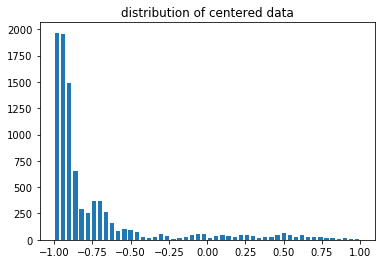

In [129]:
hist, bins = np.histogram(prices_norm, bins=50)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.title("distribution of centered data")
plt.show()

In [ ]:
#test that apple and amazon have the same variance

aapl = quandl.get_table('WIKI/PRICES', ticker='AAPL')
amzn = quandl.get_table('WIKI/PRICES', ticker='AMZN')